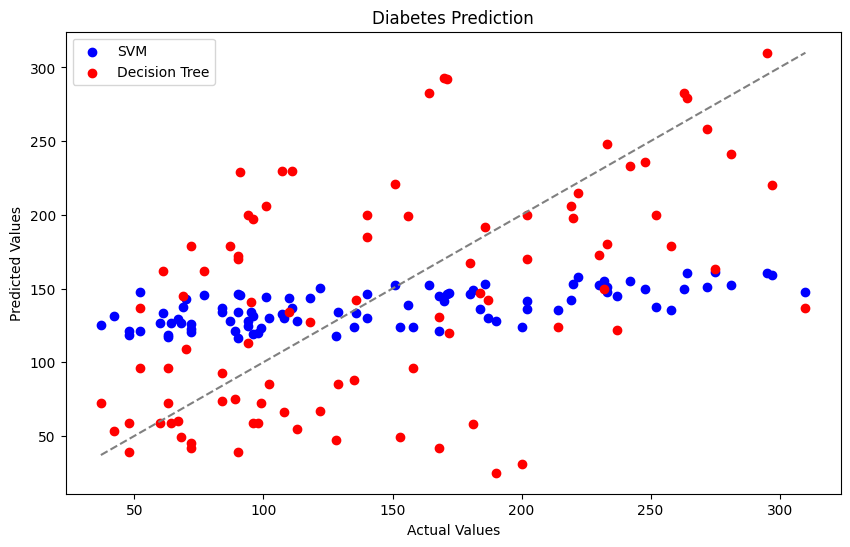

SVM Mean Squared Error: 4333.285954518086
Decision Tree Mean Squared Error: 4978.91011235955


In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)

# Train a decision tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_predictions, color='blue', label='SVM')
plt.scatter(y_test, dt_predictions, color='red', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Diabetes Prediction')
plt.legend()
plt.show()

print(f"SVM Mean Squared Error: {svm_mse}")
print(f"Decision Tree Mean Squared Error: {dt_mse}")



In [3]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
import pandas as pd
# Get feature importances from the trained decision tree model
feature_importances = dt_model.feature_importances_

# Create a DataFrame to display the feature importances
importances_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_df)

  Feature  Importance
2     bmi    0.421242
8      s5    0.152558
4      s1    0.093547
9      s6    0.065755
0     age    0.062356
3      bp    0.058084
6      s3    0.057486
5      s2    0.053884
7      s4    0.028553
1     sex    0.006535


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model with all features
rf_model_all = RandomForestRegressor()
rf_model_all.fit(X_train, y_train)
rf_predictions_all = rf_model_all.predict(X_test)
rf_mse_all = mean_squared_error(y_test, rf_predictions_all)

# Select top 4 features based on feature importances
top_4_features = importances_df['Feature'].head(4).values
top_4_indices = [diabetes.feature_names.index(feature) for feature in top_4_features]

# Train a random forest model with top 4 features
X_train_top_4 = X_train[:, top_4_indices]
X_test_top_4 = X_test[:, top_4_indices]

rf_model_top_4 = RandomForestRegressor()
rf_model_top_4.fit(X_train_top_4, y_train)
rf_predictions_top_4 = rf_model_top_4.predict(X_test_top_4)
rf_mse_top_4 = mean_squared_error(y_test, rf_predictions_top_4)

# Compare the accuracies
print(f"Random Forest with all features Mean Squared Error: {rf_mse_all}")
print(f"Random Forest with top 4 features Mean Squared Error: {rf_mse_top_4}")

Random Forest with all features Mean Squared Error: 3053.055970786517
Random Forest with top 4 features Mean Squared Error: 3141.97207752809


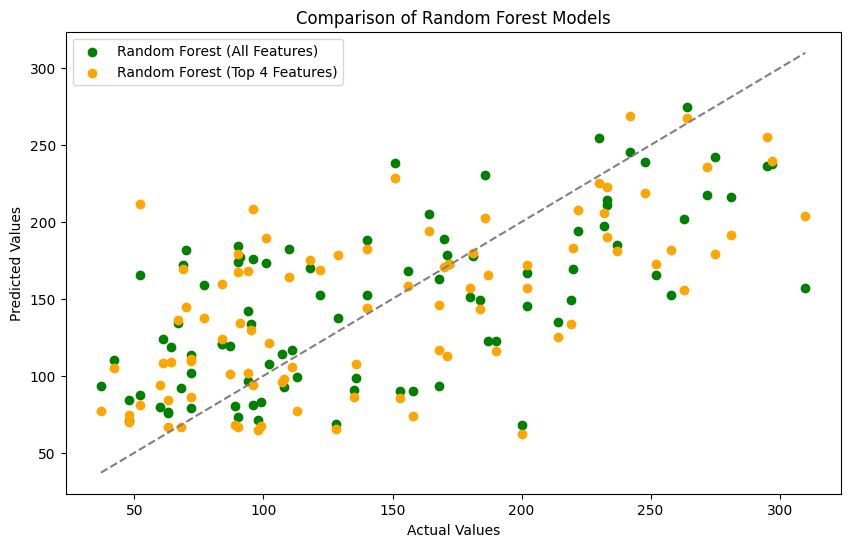

In [7]:
# Visualize the comparison between the two random forests
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions_all, color='green', label='Random Forest (All Features)')
plt.scatter(y_test, rf_predictions_top_4, color='orange', label='Random Forest (Top 4 Features)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Random Forest Models')
plt.legend()
plt.show()

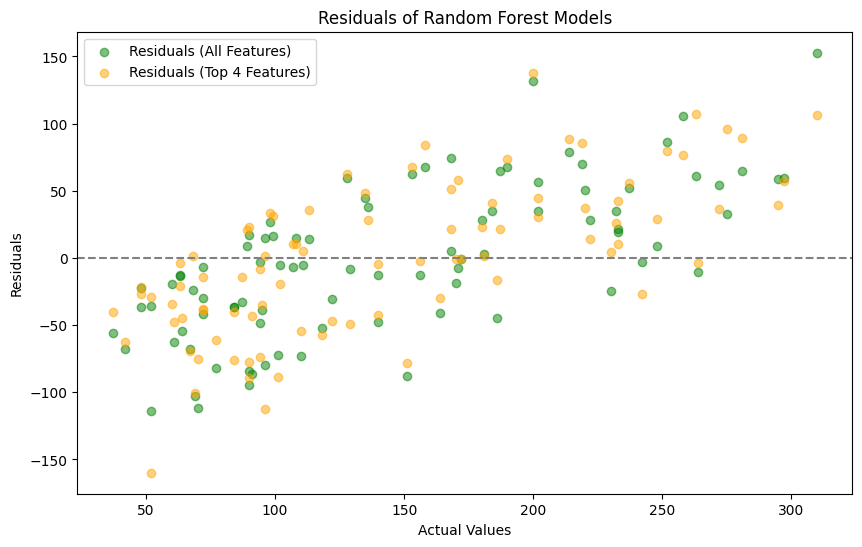

In [10]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals_all = y_test - rf_predictions_all
residuals_top_4 = y_test - rf_predictions_top_4

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_all, color='green', alpha=0.5, label='Residuals (All Features)')
plt.scatter(y_test, residuals_top_4, color='orange', alpha=0.5, label='Residuals (Top 4 Features)')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals of Random Forest Models')
plt.legend()
plt.show()

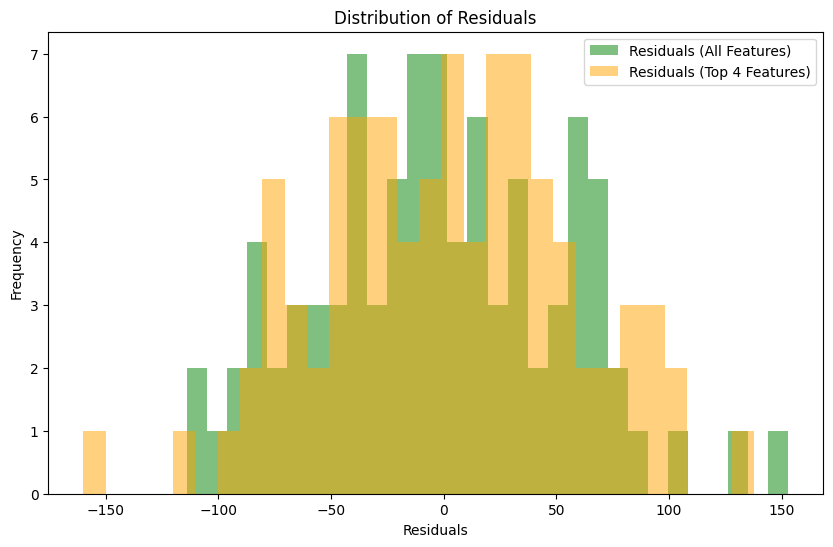

In [11]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals_all = y_test - rf_predictions_all
residuals_top_4 = y_test - rf_predictions_top_4

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(residuals_all, bins=30, alpha=0.5, color='green', label='Residuals (All Features)')
plt.hist(residuals_top_4, bins=30, alpha=0.5, color='orange', label='Residuals (Top 4 Features)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.show()